# Trabajo Práctico N2: Matrices Insumo-Producto.

## Consigna 1

Probar que $$(I − A)^{-1} = I + A + A^2 + A^3 + . . . + A^n + . . . \implies \lim_{n \to \infty} A^{n+1} = 0$$

Sabemos que para cualquier matriz inversible M, multiplicar M por su inversa $M^{-1}$ resulta en la matriz identidad, vamos a ver que pasa al multiplicar $(I-A)$ por $(I-A)^{-1}$ sabiendo que $(I-A)^{-1}$ vale la serie de potencias de arriba.

Por hipotesis:
$$(I-A)^{-1} = \sum_{j=0}^{\infty}A^j = \lim_{n \to \infty}\sum_{j=0}^{n}A^j$$

Multiplicando por la $(I-A)$ a ambos lados y tomando limite al infinito:
$$ I = (I-A)(\lim_{n \to \infty}\sum_{j=0}^{n}A^j) = \lim_{n \to \infty}(I-A)\sum_{j=0}^{n}A^j = \lim_{n \to \infty} I + A + A^2 + ... + A^n - A - A^2 - A^3 - ... - A^n - A^{n+1} = \lim_{n \to \infty} I - A^{n+1} = I - \lim_{n \to \infty} A^{n+1} = I$$

Esto es porque $||A||<1$, cada vez que elevamos $||A||$ a una potencia más alta, el valor de $||A||^{n+1}$ se hace cada vez más pequeño, tendiendo a cero cuando $n→∞$. 
$$\lim_{n \to \infty} ||A||^{n+1} = 0$$

Esto nos lleva a la conclusión de que:

$$\lim_{n \to \infty} ||A^{n+1}|| = 0$$


Esto significa que todos los elementos de $A^{n+1}$ se acercan a cero a medida que $n$ aumenta. Esto se debe a que si la norma de una matriz tiende a cero, entonces todos sus elementos también deben tender a cero.

Entonces: $$\lim_{n \to \infty} A^{n+1} = 0$$

Y por lo tanto, la serie de sumas infinita vale que:
$$ (I-A)(I + A + A^2 + A^3 + ... + A^n) = I + A + A^2 + ... + A^n - A - A^2 - A^3 - ... - A^n - A^{n+1} = I - A^{n+1} = I$$ 


## Consigna 2: Comenzamos graficando, para las dos matrices A1 y A2, dos vectores, donde  cada uno de sus elementos representa la norma 2 de la matriz elevada a la potencia que corresponde a su índice

In [1]:
from funciones2 import *

In [2]:
# Definir las matrices A1 y A2 
A1 = np.array([[0.186, 0.521,0.014, 0.32, 0.134],
               [0.24,0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.303, 0.256, 0.323, 0.225, 0.257]])

A2 = np.array([[0.186, 0.521,0.014, 0.32, 0.134],
               [0.24,0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12, 0.311, 0.302, 0.208],
               [0.173, 0.03, 0.133, 0.14, 0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])

# Número de potencias a calcular


def calcular_normas_potencias(matriz, potencia):
    """
    Función que calcula la norma de las potencias

    Parámetros
    -----------
    matriz : matriz a la que se le calcula la norma de las potencias

    potencia: potencia a la que se va a elevar la matriz

    Returns
    --------
    
    a: Vector con las normas de las matrices A^1, A^2, ..., A^potencia
    
    
    """
    
    # Inicializar los vectores para almacenar las normas
    a = np.zeros(potencia)
    
    
    # Inicializo A como la identidad
    A_pot = np.eye(matriz.shape[0])
    A_pot = A_pot @ matriz #A^1
      
    
    for i in range(potencia):
        a[i] = np.linalg.norm(A_pot, 2)  # Calcular la norma 2 de A^n
        
        # Actualizar la matriz A_pot multiplicándolas por la matriz
        A_pot = A_pot @ matriz
       
    return a

a1 = calcular_normas_potencias(A1, 250)
a2 = calcular_normas_potencias(A2, 250)


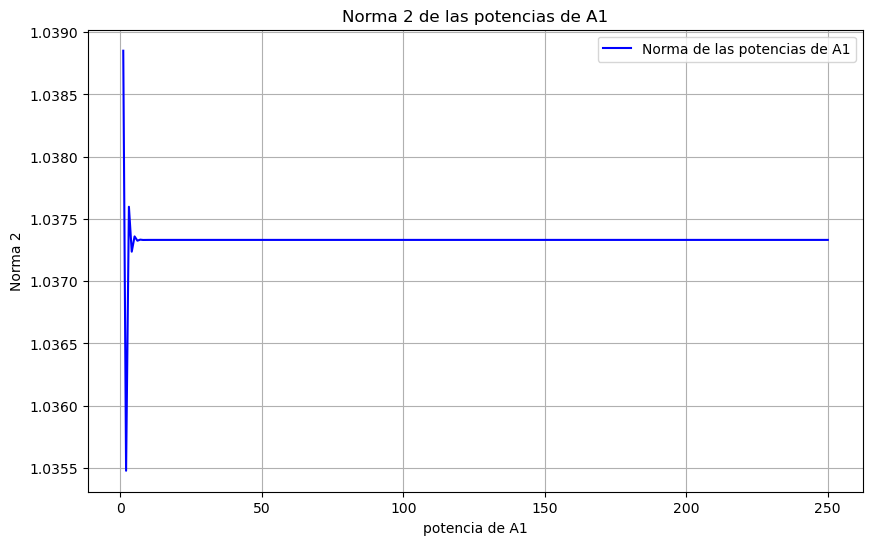

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 250+1), a1, label='Norma de las potencias de A1', color='blue')
plt.xlabel('potencia de A1')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1')
plt.legend()
plt.grid(True)
plt.show()

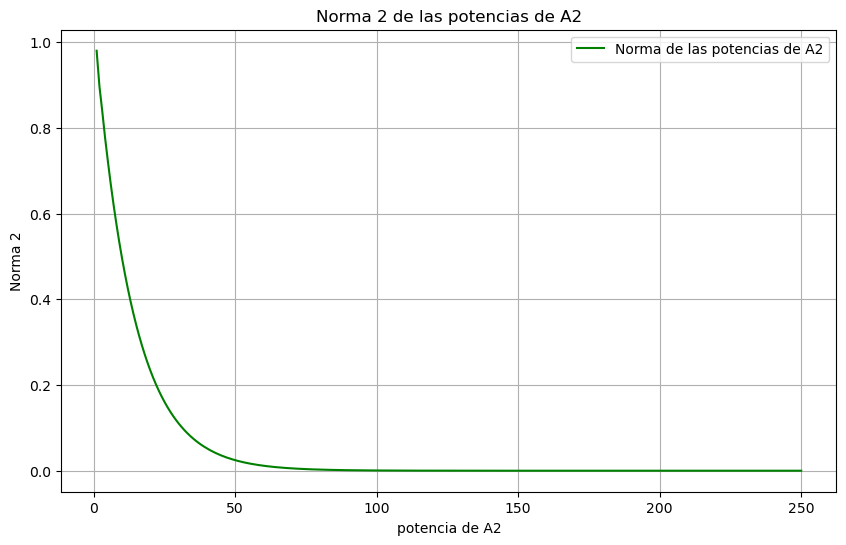

In [4]:
# Graficar los resultados 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 250+1), a2, label='Norma de las potencias de A2', color='green')
plt.xlabel('potencia de A2')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A2')
plt.legend()
plt.grid(True)
plt.show()

Con estos gráficos podemos ver que la norma de las potencias de A1 converge a 1, esto nos puede indicar que el radio espectral es 1, lo que hace que no converga a 0.En cambio la norma de las potencias de A2 tienden a 0 cuando las potencias tienden a 250, es decir, convergen y esto se debe a que el radio espectral es mas menor a 1.

## Consigna 3: transcribir en una tabla el promedio de los autovalores de las 250 iteraciones de Monte Carlo para cada matriz, poniendo además el desvío estandar encontrado.


In [7]:
#metodo de Monte Carlo, se realizan 250 iteraciones de la funcion del metodo de la potencia

def metodo_montecarlo(matriz, iteraciones): 
    """
    Función que calcula el método de Monte Carlo, realiza una cantidad de iteraciones de la función del método de la potencia

    Parámetros
    -----------
    matriz : matriz a la que le aplica el método de montecarlo
    iteraciones: cantidad de iteraciones que se van a realizar

    Returns
    --------
    promedio: El promedio de los autovalores despues de las iteraciones de Monte Carlo.
    desvío: El desvío estándar de las estimaciones obtenidas, lo que da una idea de la estabilidad de las iteraciones.
    
    """

    valor = np.zeros(iteraciones)    
    for i in range(iteraciones):
         valor[i] = metodo_de_la_potencia(matriz)
    promedio = np.mean(valor) 
    desvio = np.std(valor)
    return promedio, desvio
    
    
autovalor_A1 = metodo_montecarlo(A1, 250)[0]  #promedio de 250 ejecuciones del metodo de la potencia
autovalor_A2 = metodo_montecarlo(A2, 250)[0]
desvio_A1 = metodo_montecarlo(A1, 250)[1] #desvio de las 250 ejecuciones del metodo de la potencia
desvio_A2 = metodo_montecarlo(A2, 250)[1]

#creamos una tabla con los valores pedidos 

data = [[autovalor_A1, autovalor_A2], [desvio_A1, desvio_A2]]
tabla = pd.DataFrame(data, columns=['A1', 'A2'])
tabla.index = ['Autovalor', 'Desvio estandar']
tabla

,A1,A2
Autovalor,1.000000e+00,9.276514e-01
Desvio estandar,3.417871e-11,1.072647e-10


In [8]:
#chequeo
avals = np.linalg.eigvals(A1)
avals.max()
avals2 =  np.linalg.eigvals(A2)
avals2.max()
print(avals.max(), avals2.max())

(1+0j) (0.927651447212361+0j)


## Consigna 4

### a) De forma similar a la consigna 2, graficar la serie de potencias $(I − A)^{−1}$ de $A_1$ y $A_2$ (siguiendo la ecuación 4) para para n = 10 y n = 100.

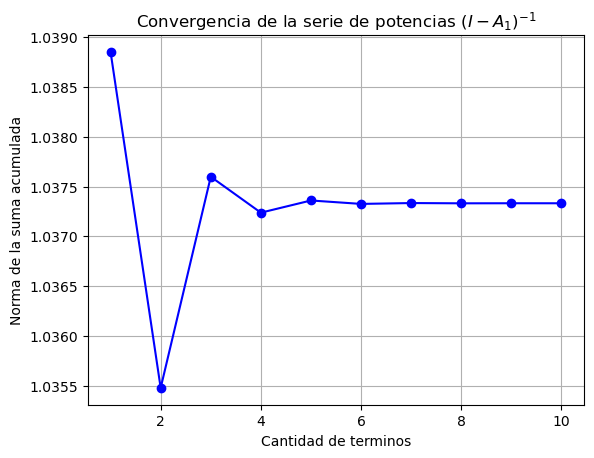

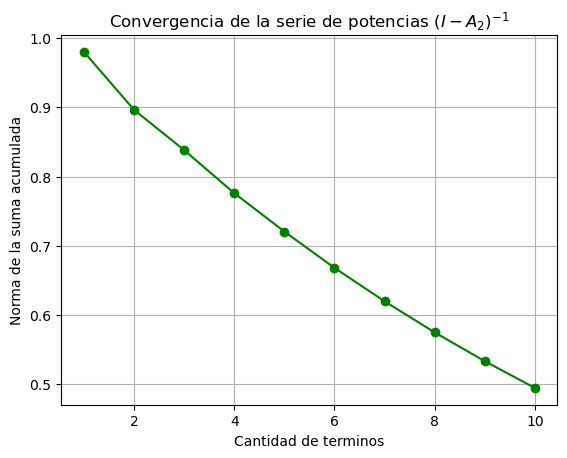

In [9]:
suma_normas_A1 = calcular_normas_potencias(A1, 10)
suma_normas_A2 = calcular_normas_potencias(A2, 10)

# Graficar la norma de las potencias
plt.plot(range(1, len(suma_normas_A1) + 1), suma_normas_A1, marker='o', color = "blue")
plt.xlabel('Cantidad de terminos')
plt.ylabel('Norma de la suma acumulada')
plt.title('Convergencia de la serie de potencias $(I - A_1)^{-1}$')
plt.grid(True)
plt.show()

plt.plot(range(1, len(suma_normas_A2) + 1), suma_normas_A2, marker='o', color = "green")
plt.xlabel('Cantidad de terminos')
plt.ylabel('Norma de la suma acumulada')
plt.title('Convergencia de la serie de potencias $(I - A_2)^{-1}$')
plt.grid(True)
plt.show()

### b) ¿Hay convergencia para ambas matrices? Argumentar la respuesta.
Para que $A^n$ tienda a la matriz cero, el radio espectral de $A$ (es decir, el valor absoluto del mayor autovalor de $A$) debe ser menor que 1. Cuando $ρ(A)<1$, cada autovalor $λ$ de $A$ satisface $∣λ∣<1$. Por lo tanto, al elevar A a potencias sucesivamente mayores, los valores $ \lambda^n$ tienden a 0 para cada autovalor de $A$. Esto provoca que todos los términos $𝐴_𝑛$ en la serie de potencias se hagan cada vez más pequeños y, eventualmente, converjan a la matriz cero.
 
Viendo los gráficos, se puede observar que $A_2$ converge a 0 y que la matriz $A_1$ converge pero a 1.

### c) ¿Podría establecer una regla por la cual se pueda asegurar convergencia de la serie infinita?
Para asegurar la convergencia a 0 de la serie infinita podriamos establecer la regla que esto solo sucede si el mayor autovalor de A en $(I-A)^{-1}$ es menor estricto a 1 (en valor absoluto). En cambio, si el radio espectral es igual a 1, el comportamiento de la serie infinita depende de las características de los autovalores de módulo 1 y de los autovalores, que en este caso converge a un numero distinto de cero.

### d) En caso de existir convergencia, grafique el error obtenido 

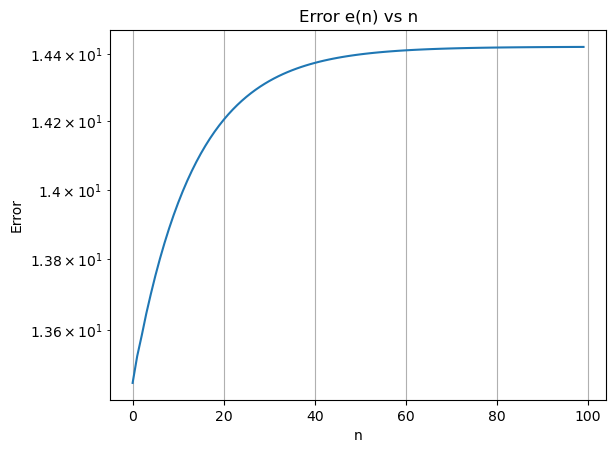

In [12]:
#calcular inversa de (I-A_1)

I = np.eye(A2.shape[0])

L, U, P = calcular_LU(I - A2)

L = inversa_LU(L, U, P)

def calcular_error(matriz, potencia):
    """
    Función que calcula el error en caso de que exista convergencia

    Parámetros
    ----------
    matriz: matriz a la cual se le calculan las potencias
    potencia: número que especifica cuantas potencias de la matriz se deben calcular

    Returns
    -------
    a : el error calculado en cada iteración
    
    """

    a = np.zeros(potencia)
    
    
    # Inicializo A como la identidad
    A_pot = np.eye(matriz.shape[0])
    #variable donde se guarda la suma de matrices
    suma = np.eye(matriz.shape[0])
    
    for i in range(potencia):
        A_pot = A_pot @ matriz
        suma = suma + A_pot
        a[i] = np.linalg.norm(A_pot - L, ord = 2)   #cada componente es el error obtenido en cada iteracion
       
    return a

errores = calcular_error(A2, 100)

plt.plot(errores)
plt.yscale('log')  # Usar escala logarítmica para visualizar mejor
plt.title('Error e(n) vs n')
plt.xlabel('n')
plt.ylabel('Error')
plt.grid()
plt.show()

## Consigna 5: Retomar de las matrices insumo-producto de los paises P1 y P2 asignados en el TP1, y mediante el método de la potencia, encontrar el autovalor mayor de cada uno de las $A^{ss}$ y $A^{rr}$

Como nos piden retomar las matrices insumo-producto del TP1, volvemos a tomar como entrada el excel dado para realizar el trabajo, lo convertimos a dataframe y comenzamos a hacer una limpieza hasta obtener las matrices $A^{bb}$, $A^{ss}$ con las cuales vamos a trabajar.

In [13]:
data = pd.read_csv('matrizlatina2011.csv')
data = pd.DataFrame(data)

#Seleccionamos las filas de country_iso3 pertenecientes a los paises Bolivia y el Salvador
nueva_data1 = data[data['Country_iso3'].isin(['BOL', 'SLV'])]


#Designamos de index a la columna de Country_iso3 para facilitar el trabajo de filtrado que continua
nueva_data1.set_index('Country_iso3', inplace=True)


#Seleccionamos las columnas que comienzan con "BOL" o "SLV"
columnas_seleccionadas = [col for col in nueva_data1.columns if col[:3].upper() in ['BOL', 'SLV']]

#Nos quedamos solo con las columnas seleccionadas y las filas que teniamos en nueva_data
nueva_data = nueva_data1[columnas_seleccionadas]

#Matriz intraregional de Bolivia

#Selecciono las filas correspondientes a Bolivia
Z_bb = nueva_data.loc["BOL"]

#Selecciono las columnas de los sectores de Bolivia
Z_bb = Z_bb.iloc[:,0:40]

#Aplicamos el mismo procedimiento para crear la matriz intraregional del Salvador
Z_ss = nueva_data.loc["SLV"]

Z_ss = Z_ss.iloc[:,40::]

#Construimos la matriz interregional Bolivia-El Salvador
#Tomamos las columnas de Bolivia
Z_bs = nueva_data.loc["BOL"]

#Tomamos las filas de los distintos sectores del Salvador
Z_bs = Z_bs.iloc[:, 40::]

#Construimos la matriz interregional El Salvador-Bolivia
#Tomamos las columnas del Salvador
Z_sb = nueva_data.loc["SLV"]

#Tomamos las columnas de los distintos sectores de Bolivia
Z_sb = Z_sb.iloc[:,0:40]

#Obtenemos de la columna "Output" la produccion total de cada sector de Bolivia
output_bolivia = pd.DataFrame(nueva_data1.iloc[0:40,-1])
output_bolivia = output_bolivia["Output"].replace(0,1) #cambiamos 0 por 1 para poder invertir luego la matriz P
output_bolivia = output_bolivia.to_numpy() #se puede usar? convertimos en array 

#vector produccion en el salvador
output_salvador = pd.DataFrame(nueva_data1.iloc[40:80,-1])
output_salvador = output_salvador["Output"].replace(0,1) #cambiamos 0s por 1s para poder invertir luego la matriz P
output_salvador = output_salvador.to_numpy() #convertimos en array

#funcion para transformar los vectores de produccion en matriz diagonal
def convertirDiagonal(V):
    """
    Función que toma un vector y lo transforma en una matriz de ceros donde en su
    diagonal se encuemntra este vector
    
    Parámetros
    ----------
      V: vector de produccion
    Returns
    -------
    A: matriz diagonal de R^(nxn) con el vector v como diagonal
    
    """
    A = np.zeros((len(V), len(V)))
    for i in range(0, len(V)):
        A[i,i] = V[i]
    
    return A

#Convertimos cada vector de produccion en una matriz diagonal
Pb = convertirDiagonal(output_bolivia)
Ps = convertirDiagonal(output_salvador)

#obtenemos L,U y P
L1, U1, P1 = calcular_LU(Pb)

inversa_Pb = inversa_LU(L1,U1,P1)

#obtenemos ahora L, U y P para Ps
L2, U2, P2 = calcular_LU(Ps)

inversa_Ps = inversa_LU(L2, U2, P2)

#Ahora si usando la ecuacion dada, encontramos las submatrices de A
Abb = Z_bb @ inversa_Pb
Abs = Z_bs @ inversa_Ps
Asb = Z_sb @ inversa_Pb
Ass = Z_ss @ inversa_Ps

#Para poder operar con funciones pasamos los dataframes a matrices de Numpy
matriz_Abb = Abb.to_numpy()
matriz_Abs = Abs.to_numpy()
matriz_Ass = Ass.to_numpy()
matriz_Asb = Asb.to_numpy()

In [17]:
#buscamos el mayor autovalor de cada matriz con el metodo de la potencia
autovalor_Arr = metodo_de_la_potencia(matriz_Abb)
autovalor_Ass = metodo_de_la_potencia(matriz_Ass)
print(autovalor_Arr , autovalor_Ass)

0.3038573285854798 0.2632725029007924


Por lo dicho en el punto 4, ambas matrices convergen ya que el mayor autovalor de cada una es menor a 1.

## Consigna 6

Sea $n \geq 2$ y $E_n \in \mathbb{R^{nxn}}$ una matriz definida de la siguiente manera:

$$E_n = I_n - \frac{1}{n}  e e^{t}$$

$e \in \mathbb{R^{n}}$ es un vector columna con todos $1's$, y $I_n$ es la matriz identidad de $n$ x $n$



### a) Probar que para cualquier vector $z \in \mathbb{R^{n}}$ el promedio de las componentes del vector $E_nz$ es 0.

$$E_n = 
\begin{pmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{pmatrix} - \begin{pmatrix}
\frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n} \\
\frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n} & \cdots & \frac{1}{n}
\end{pmatrix} = \begin{pmatrix}
1- \frac{1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n} \\
-\frac{1}{n} & 1- \frac{1}{n} & \cdots & -\frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & \cdots & 1- \frac{1}{n}
\end{pmatrix}$$

Entonces 
$$E_nz =
\begin{pmatrix}
1- \frac{1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n} \\
-\frac{1}{n} & 1- \frac{1}{n} & \cdots & -\frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & \cdots & 1- \frac{1}{n}
\end{pmatrix}
\begin{pmatrix}
z_{1} \\
z_{2} \\
\vdots \\
z_n 
\end{pmatrix}
$$
El resultado es un vector de la forma 
$$E_nz =
\begin{pmatrix}
z_1 - \frac{1}{n}(z_1 + \cdots + z_n) \\
z_2 - \frac{1}{n}(z_1 + \cdots + z_n) \\
\vdots \\
z_n - \frac{1}{n}(z_1 + \cdots + z_n)
\end{pmatrix}
$$

Ahora vamos a ver que el promedio de las componentes de este vector es 0

$$Promedio = \frac{\sum_{i=1}^{n} ({z_i - \frac{1}{n}}\sum_{j=1}^{n} {z_j})}{n} = \frac{\sum_{i=1}^{n} {z_i - \frac{1}{n}\sum_{i=1}^{n}}\sum_{j=1}^{n} {z_j})}{n} = \frac{\sum_{i=1}^{n} {z_i - }\sum_{j=1}^{n} {z_j}}{n} $$

Observamos que ambas sumatorias suman los mismos terminos, por lo cual se cancelan todos

$$Promedio = \frac{\sum_{i=1}^{n} {z_i - }\sum_{j=1}^{n} {z_j}}{n} = \frac{0}{n} = 0$$

##### Analizar $E_nA$ y describir que efecto tiene $E_n$ sobre la matriz $A$ de $n$ x $n$

$$E_nA = 
\begin{pmatrix}
1- \frac{1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n} \\
-\frac{1}{n} & 1- \frac{1}{n} & \cdots & -\frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & \cdots & 1- \frac{1}{n}
\end{pmatrix}
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix} 
$$

Podemos ver que el producto resultante sera una matriz de $n$ x $n$ cuyas columnas son el resultado de multiplicar la matriz $E_n$ por cada columna de $A$. Si llamamos ${(c_1, c_2,..., c_n)}$ a las columnas de $A$, podemos expresar el resultado de la siguente manera:

$$E_nA = 
\begin{pmatrix}
\vdots & \vdots &  & \vdots \\
E_nc_1 & E_nc_2 & \cdots & E_nc_n \\
\vdots & \vdots &  & \vdots \\
\end{pmatrix}$$

Entonces como probamos que para cualquier vector $z \in \mathbb{R^{n}}$ el promedio de las componentes de cada vector $E_nz$ es 0, el promedio de las componentes de cada vector $E_nc_i$ para $1 \leq i \leq n$ , es 0.

Podemos concluir que el resultado de multiplicar a izquierda de una matriz $A$ por $E_n$ me da una matriz cuyas columnas tienen la característica de que el promedio de sus componentes es 0.

### b) Calcular analíticamente todos los autovalores y autovectores de En

Para encontrar los autovectores de $E_n$, consideramos la base de  vectores $ B = \{e,\,d_2,\,...\,,\,d_n\}$ de $\mathbb{R^{n}}$, donde $\{d_2,\,...\,,\,d_n\}$ son tales que $\langle {e},\,{d_i} \rangle=0$ para $i = 2,\,...,\,n$
\
Veamos que pasa cuando multiplicamos a $E_n$ por $e$:
\
$$E_n\,e = (I_n - \frac{1}{n}  e\,e^{t})\,e\\
= e - \frac{1}{n}\,e\,e^{t}\,e$$
Observamos que $e^{t}\,e = n$ dado que $e$ tiene solo unos. 

$$E_n\,e = e - e \\
E_n\,e = 0$$\
Entonces como $e \neq 0$, $e$ es un autovector asociado al autovalor $\lambda = 0$. La multiplicidad algebraica de este autovalor es 1 y la geometrica tambien, ya que $e$ es el unico vector en su autoespacio.

Veamos ahora que pasa cuando multiplicamos a $E_n$ por algun $d_i$ ; $i = 2,...,n\,$:

$$E_n\,d_i = (I_n - \frac{1}{n}  e\,e^{t})\,d_i\\
= e - \frac{1}{n}\,e\,e^{t}\,d_i$$
Observamos que $e^{t}\,d_i = 0$ dado que son ortogonales. 

$$E_n\,d_i = d$$ 

Entonces $\{d_2,\,...\,,\,d_n\}$ son autovectores asociados al autovalor $\lambda = 1$.  La multiplicidad algebraica de este autovalor es $n\,-\,1$ y la geometrica tambien, ya que el autoespacio de este autovalor es $\{d_2,\,...\,,\,d_n\}$, y tiene $n\,-\,1$ vectores.

Como coincide la multiplicidad algebraica y geometrica para los dos autovalores de $E_n$, podemos afirmar que se trata de una base de autovectores de $E_n$:

$$B= \{e,\,d_2,\,...\,,\,d_n\}$$

Es decir, no hay otro autovector de $E_n$ linealmente independiente.


##### Nucleo e Imagen de $E_n$:

Sabemos que $Nu(E_n) = \{\,v\, :\, E_n v = 0$ \}. Como vimos anteriormente, esto sucedia unicamente para el vector $e$.
Por lo tanto, 

$$Nu(E_n) = \langle e \rangle$$

La dimension del nucleo es 1.

Por otro lado, $Im(E_n) = \{\,u\, :\, E_n v = u$ \}.

Vimos que para la base $\{d_2,\,...\,,\,d_n\}$ se cumplia que $E_nd = d$. Por lo tanto $\{d_2,\,...\,,\,d_n\}$ estan en la Imagen de $E_n$.

Sabemos por el teorema de la dimension, que $$dim(Im(E_n)) + dim(Nu(E_n)) = n$$

Entoneces $dim(Im(E_n)) = n-1$ 

Por lo tanto $$Im(E_n) = \langle d_2,\,...\,,\,d_n \rangle$$


### c) Probar que $En$ es una matriz de proyección ortogonal. ¿Sobre qué subespacio proyecta?

Una matriz es de proyeccion si y solo si $$Pv = v, \forall v \in Im(P)$$
Ya vimos que $Im(E_n) = \langle d_2,\,...\,,\,d_n \rangle$, y $E_n d_i = d_i$ para $i = 2,...,n\,$

Entonces $E_n$ es una matriz de proyeccion

Ademas, $\langle {e},\,{d_i} \rangle=0$ para $i = 2,\,...,\,n$
Es decir, todos los vectores de la imagen son ortogonales a $e$ (el unico vector del nucleo)

Entonces $$Im(E_n) \perp Nu(E_n))$$

Por lo tanto, $E_n$ es una matriz de proyeccion ortogonal.

Esta matriz proyecta vectores de $\mathbb{R}^n$ sobre el subespacio generado por los vectores de la imagen de $E_n$



### d) Responder Verdadero o Falso, demostrando o dando un contraejemplo:

#### I) $E_n$ es una matriz ortogonal.

Para que $E_n$ sea ortogonal, se debe cumplir que $E_n^{t}E_n = I_n$.
En este caso, $E_n$ es simetrica por lo cual $E_n^{t} = E_n$

Entonces se deberia dar que $E_n^2 = I_n$ 

Ya vimos que el resultado de multiplicar una matriz cualquiera a izquierda por $E_n$ es una matriz cuyos promedios de las componentes de sus columnas es 0. Es decir, que el promedio de las componentes de las columnas de $E_n^2$ es 0.

Sin embargo, esto no es cierto para la matriz identidad, ya que el promedio de las componentes de las columnas de $I_n$ es $\frac{1}{n}$. Por lo tanto $E_n^2 \neq I$.
Finalmente, $E_n$ no es ortogonal.

#### II) $E_n$ es singular

Ya vimos que $E_n$ tiene un autovalor igual a cero. Existe un vector propio no trivial asociado a este autovalor, lo que significa que $Ax = 0$ tiene soluciones no triviales.

Esto indica que el núcleo de $A$ tiene dimensión mayor que cero. Por lo tanto, el rango de $A$ es menor que su tamaño, lo que hace que $A$ sea singular (no tiene inversa).


#### III) $E_n$ es definida positiva

$E_n$ es definida positiva si y solo si todos los determinantes de sus principales submatrices son positivos.
Ya vimos que $E_n$ es singular, por lo tanto $det(E_n) = 0$.
Entonces $E_n$ no es definida positiva.

#### IV) $Traza(E_n) = n - 1$

La traza de $E_n$ es el producto de los elementos de su diagonal.
$$E_nA = 
\begin{pmatrix}
1- \frac{1}{n} & -\frac{1}{n} & \cdots & -\frac{1}{n} \\
-\frac{1}{n} & 1- \frac{1}{n} & \cdots & -\frac{1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
-\frac{1}{n} & -\frac{1}{n} & \cdots & 1- \frac{1}{n}
\end{pmatrix}$$

$$Traza(E_n) = \prod_{i=1}^{n} (1 - \frac{1}{n})\\ = (1 - \frac{1}{n})^n \neq n-1$$

## Consigna 7 : Encontrar los 2 primeros autovectores usando el método de la potencia usando el algoritmo de Deflación de Hotelling.

In [18]:
def generar_En(n):
    """
    Función que genera la matriz En R^(nxn) 

    Parámetros
    -----------
    n: tamaño de la matriz cuadrada a generar

    Returns
    -------
    En : la matriz cuadrada
    
    """
    I_n = np.eye(n)
    e = np.ones(n)
    E_n = I_n - 1/n * np.outer(e, e)
    return E_n

E_40 = generar_En(40)

#normalizamos la matriz A_ss
A_ss_norm = E_40 @ matriz_Ass

#calculamos la matriz de covarianzas
C_Ass = (A_ss_norm.T @ A_ss_norm)/ (40 - 1)


#Usamos el metodo de Hotelling para poder encontrar los dos maximos autovalores con sus respectivos autovalores_
def metodo_de_la_potencia_Hotelling(A, epsilon=1e-6):
    """
    Función que aplica el metodo de la potencia de Hotelling para calcular los dos primeros autovalores de mayor modulo y sus autovectores asociados

    Parámetros
    ----------
    A: matriz a la cual se va a aplicar el metodo Hotelling
    epsilon : 1e-6, se usa como criterio de parada

    Returns
    -------
    autovalores: lista con los dos primeros autovalores de mayor módulo
    autovectores: lista con los dos autovectores asociados a sus respectivos autovalores
    
    """
    autovalores = []
    autovectores = []  # Lista para almacenar (autovector, autovalor)
    
    for _ in range(2):  # Repetir para obtener los dos principales
        # Inicializar vector aleatorio
        v0 = np.random.rand(A.shape[0])
        v0 = v0 / np.linalg.norm(v0)  # Normalizar el vector
        
        for _ in range(40):  # Máximo de iteraciones
            v1 = A @ v0
            v1 = v1 / np.linalg.norm(v1)  # Normalizar

            # Verificar criterio de parada con epsilon directamente
            if np.linalg.norm(v1 - v0) < epsilon:
                break
            v0 = v1

        # Calcular el autovalor usando el vector final
        aval = v0.T @ ( A @ v0)
        autovalores.append(aval)
        autovectores.append(v0)
        
        # Actualizar la matriz para el siguiente autovector
        A = A - aval * np.outer(v0, v0)

    return autovalores, autovectores


avals_Ass, avecs_Ass = metodo_de_la_potencia_Hotelling(C_Ass)


In [19]:
avals = np.linalg.eigvals(C_Ass)
print("Primeros dos autovalores con numpy :" , avals[0], avals[1])
print("Primeros dos autovalores con la funcion :" , avals_Ass[0], avals_Ass[1]) 


Primeros dos autovalores con numpy : 0.01039524083871135 0.0030120136292778226
Primeros dos autovalores con la funcion : 0.010395240838710063 0.0030120136292794315


In [20]:
print("Primer autovector usando la funcion:" , avecs_Ass[0])

Primer autovector usando la funcion: [0.06722093 0.06227497 0.         0.21534275 0.18082547 0.15115401
 0.21482103 0.2468072  0.21488421 0.         0.12054651 0.11552923
 0.27152238 0.09579235 0.19411477 0.38637506 0.2317729  0.18239607
 0.30660122 0.16203432 0.12301196 0.09098368 0.08215319 0.07781751
 0.09097832 0.         0.09760043 0.         0.06274648 0.0477692
 0.09262256 0.09741061 0.09185076 0.08348154 0.02954266 0.23547648
 0.180231   0.12183594 0.06873078 0.17138649]


In [21]:
print("Segundo autovector usando la funcion:" , avecs_Ass[1])

Segundo autovector usando la funcion: [-0.13114028  0.02720664  0.          0.08299688 -0.52906257 -0.33290853
 -0.53588087 -0.21869767  0.0555275   0.         -0.03013802  0.04345349
  0.07064836 -0.27313754  0.13866109  0.13955776  0.10954764  0.08281351
  0.11320289  0.11919826  0.02125872  0.08179387  0.0741331   0.04693136
  0.04624275  0.          0.05767971  0.          0.03781599  0.02872095
  0.05585684  0.05866916  0.01406918  0.0886258   0.02247426  0.0814211
  0.16152834  0.0594725   0.03698246  0.06383723]


## Consigna 8: Utilizando los dos autovectores del Análisis en Componentes Principales de la consigna 7, proyectar las filas de Ass en un scatter de 2 dimensiones.

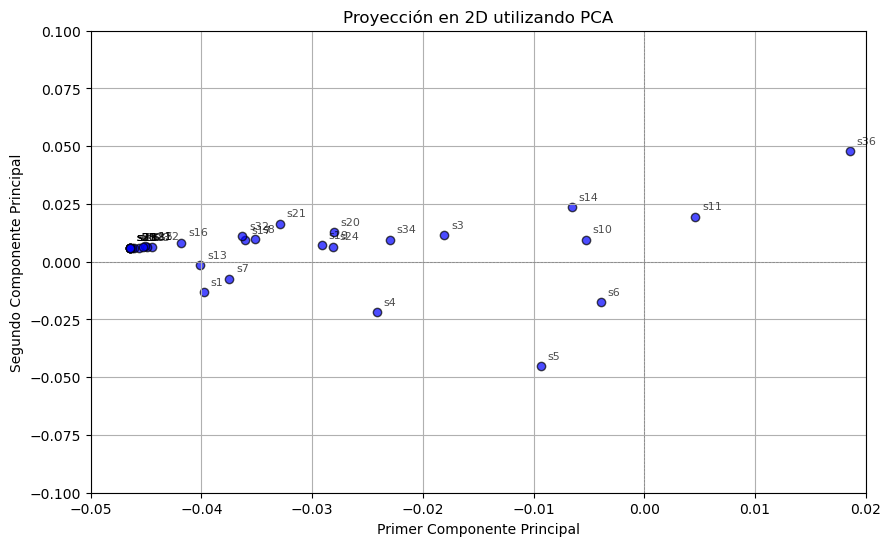

In [47]:

def proyectarPCA2(A_norm, avec, labels=None):
    """
    Función que proyecta las filas de Ass en un scatter

    Parámetros
    ----------
    C: la matriz de covarianza 
    avec: los autovectores correspondientes

    Returns
    -------
    La proyección en el scatter correspondiente
    
    """

    # Obtener los primeros dos vectores propios (componentes principales)
    vec1 = avec[0]  # Primer componente
    vec2 = avec[1]  # Segundo componente
    
    # Proyección de los datos en los dos primeros componentes principales
    proyectar_data1 = A_norm @ vec1
    proyectar_data2 = A_norm @ vec2
    
    # Crear scatter plot
    plt.figure(figsize=(10, 6))
    plt.xlim(-0.05, 0.02)
    plt.ylim(-0.1, 0.1)
    plt.scatter(proyectar_data1, proyectar_data2, alpha=0.7, color='b', edgecolors='k')
    plt.title('Proyección en 2D utilizando PCA')
    plt.xlabel('Primer Componente Principal')
    plt.ylabel('Segundo Componente Principal')
    
    # Añadir etiquetas a los puntos si se proporcionan
    if labels is not None:
        for i, label in enumerate(labels):
            plt.annotate(label, (proyectar_data1[i], proyectar_data2[i]), fontsize=8, alpha=0.7,
                         xytext=(5, 5), textcoords='offset points')  # Desplaza un poco las etiquetas
    
    # Añadir líneas de grid
    plt.grid(True)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    
    plt.show()
    

# Lista de etiquetas
labels = ["s0","s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10",
          "s11", "s12", "s13", "s14", "s15", "s16", "s17", "s18", "s19", "s20",
          "s21", "s22", "s23", "s24", "s25", "s26", "s27", "s28", "s29", "s30",
          "s31", "s32", "s33", "s34", "s35", "s36", "s37", "s38", "s39"]


scatter_Ass = proyectarPCA2(A_ss_norm, avecs_Ass, labels=labels)

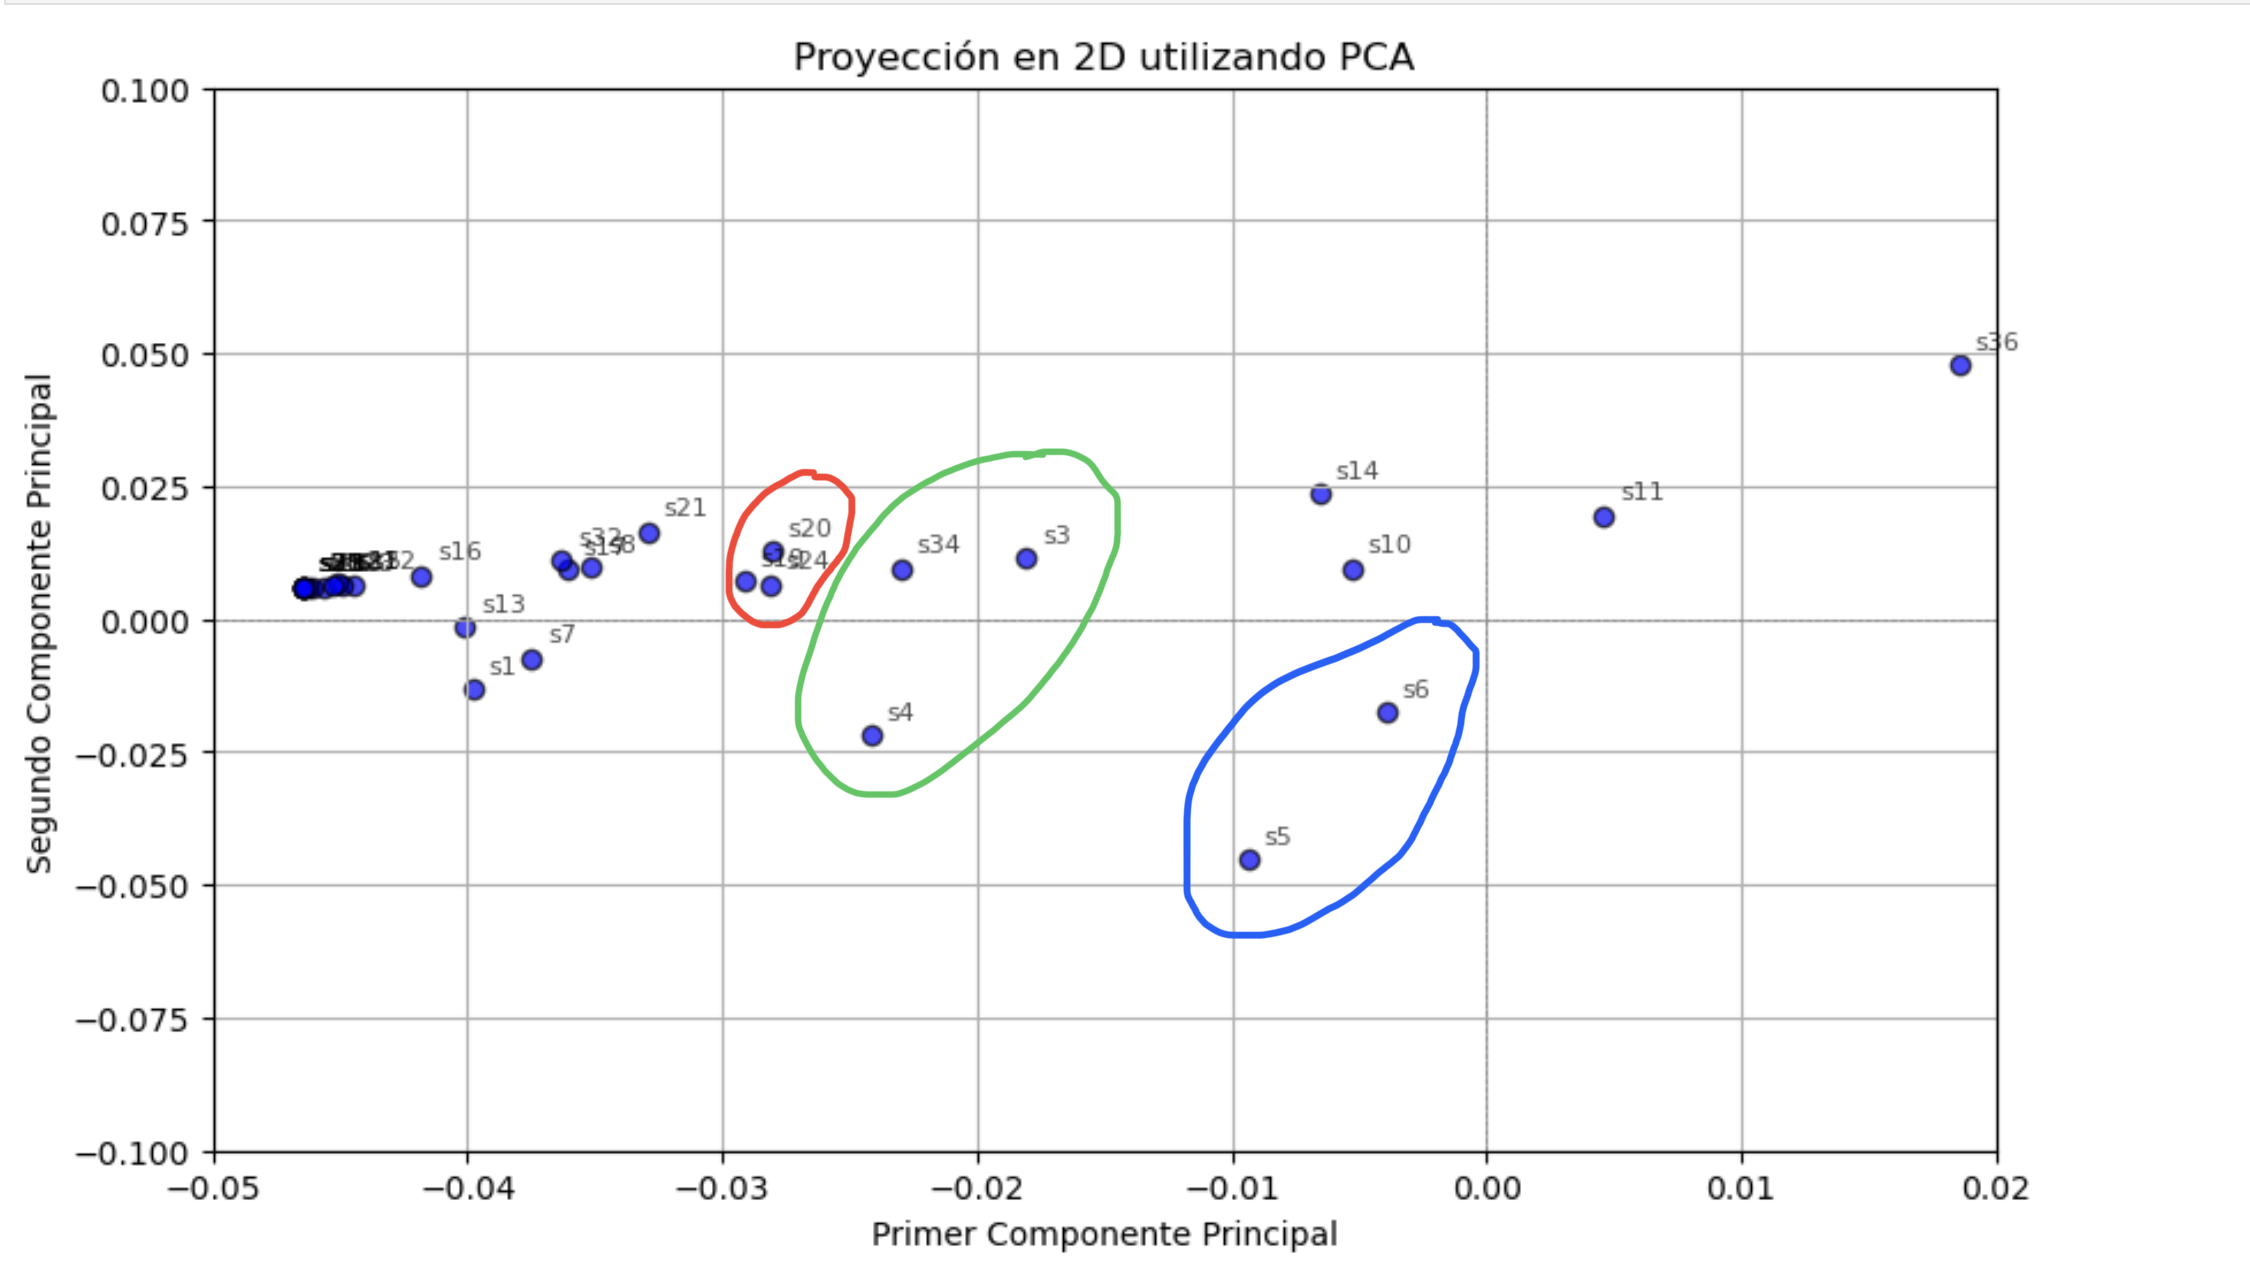

In [48]:
from IPython.display import Image

Image("./ACP1.jpg", width=1000, height=1000)



Este gráfico muestra la proyección en el espacio de las dos primeras componentes principales de la matriz $A^{ss}$. Cada punto representa un sector, y las coordenadas de cada punto están determinadas por los valores de esas dos componentes, que son las que explican la mayor parte de la varianza en los datos.

Identificamos 3 clusters, el primer agrupamiento se da en los sectores 5 y 6 que comparten un rubro relacionado a los alimentos, el segundo en los sectores 3,4 y 34 los cuales forman parte de los rubros relacionados minería, y 36 y el tercer agrupamiento se da entre 20 y el 24 los cuales se intercambian materiales metálicos y plasticos. 

Al hacer ACP los sectores se agrupan porque comparten alguna característica o tienen patron de producción que los diferencian de los otros sectores.

## Consigna 9:  Encontrar cuál es la relación de H con la suma de potencias.


Sabemos que $H$ se define como $H = A(I - A)^{-1}$ si reemplazamos $(I-A)^{-1}$ por la suma de potencias:
$$H = A (I - A)^{-1} = A (I + A + A^2 + A^3 + ... + A^n) = A + A^2 + A^3 + ... + A^n + A^{n+1}$$
$||A||<1$ por lo tanto converge, haciendo un analisis de la matriz H veremos como refuerza las relaciones entre los distintos sectores.




## Consigna 10: Repetir el análisis en Componentes Principales para las matrices H.

Vamos a tomar la matriz H generada a partir de A_ss y realizar el análisis de componentes principales, centrando los datos, creando la matriz de covarianzas y aplicando el método de Hotelling para obtener los máximos autovalores con sus correspondientes autovectores para poder proyectarlos en un scatter plot de dos dimensiones y poder visualizar las clusters obtenidos.

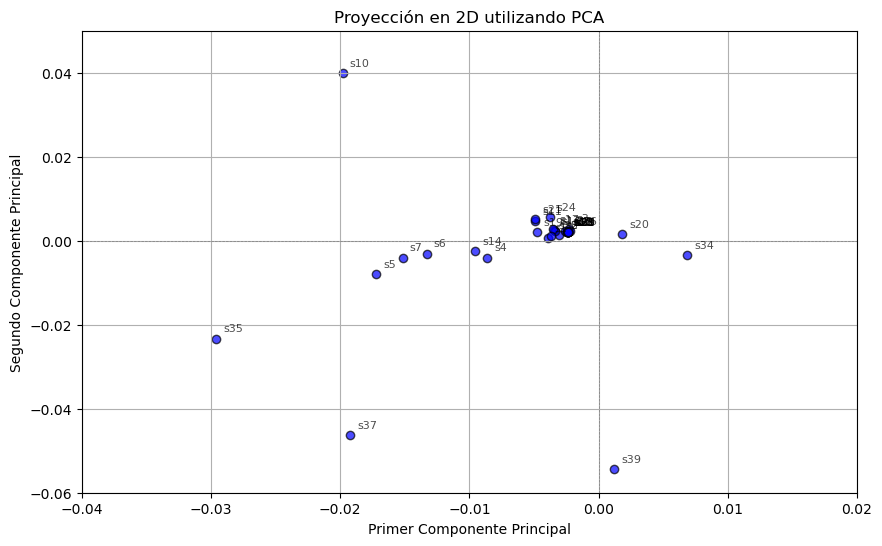

In [54]:
def generar_H(A):
    """
    Función que genera a la matriz H

    Parámetros
    ----------
    A: matriz que se utiliza para generar H

    Returns
    --------
    H: la matriz resultante
    
    """
    Id = np.eye(A.shape[0])
    temp = Id - A
    L, U, P = calcular_LU(temp)
    inversa = inversa_LU(L, U, P)
    H = A @ inversa 
    return H


H = generar_H(A_ss_norm)

E_40 = generar_En(40)

#normalizamos la matriz H

H_norm = E_40 @ H
#calculamos la matriz de covarianzas

avals_H, avecs_H = metodo_de_la_potencia_Hotelling(H_norm)
def proyectarPCA(A_norm, avec, labels=None):
    """
    Función que proyecta las filas de Ass en un scatter

    Parámetros
    ----------
    C: la matriz de covarianza 
    avec: los autovectores correspondientes

    Returns
    -------
    La proyección en el scatter correspondiente
    
    """

    # Obtener los primeros dos vectores propios (componentes principales)
    vec1 = avec[0]  # Primer componente
    vec2 = avec[1]  # Segundo componente
    
    # Proyección de los datos en los dos primeros componentes principales
    proyectar_data1 = A_norm @ vec1
    proyectar_data2 = A_norm @ vec2
    
    # Crear scatter plot
    plt.figure(figsize=(10, 6))
    plt.xlim(-0.04, 0.02)
    plt.ylim(-0.06, 0.05)
    plt.scatter(proyectar_data1, proyectar_data2, alpha=0.7, color='b', edgecolors='k')
    plt.title('Proyección en 2D utilizando PCA')
    plt.xlabel('Primer Componente Principal')
    plt.ylabel('Segundo Componente Principal')
    
    # Añadir etiquetas a los puntos si se proporcionan
    if labels is not None:
        for i, label in enumerate(labels):
            plt.annotate(label, (proyectar_data1[i], proyectar_data2[i]), fontsize=8, alpha=0.7,
                         xytext=(5, 5), textcoords='offset points')  # Desplaza un poco las etiquetas
    
    # Añadir líneas de grid
    plt.grid(True)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    
    plt.show()
    

labels_H = ["s0","s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10",
          "s11", "s12", "s13", "s14", "s15", "s16", "s17", "s18", "s19", "s20",
          "s21", "s22", "s23", "s24", "s25", "s26", "s27", "s28", "s29", "s30",
          "s31", "s32", "s33", "s34", "s35", "s36", "s37", "s38", "s39"]


scatter_H = proyectarPCA(H_norm, avecs_H, labels=labels_H)



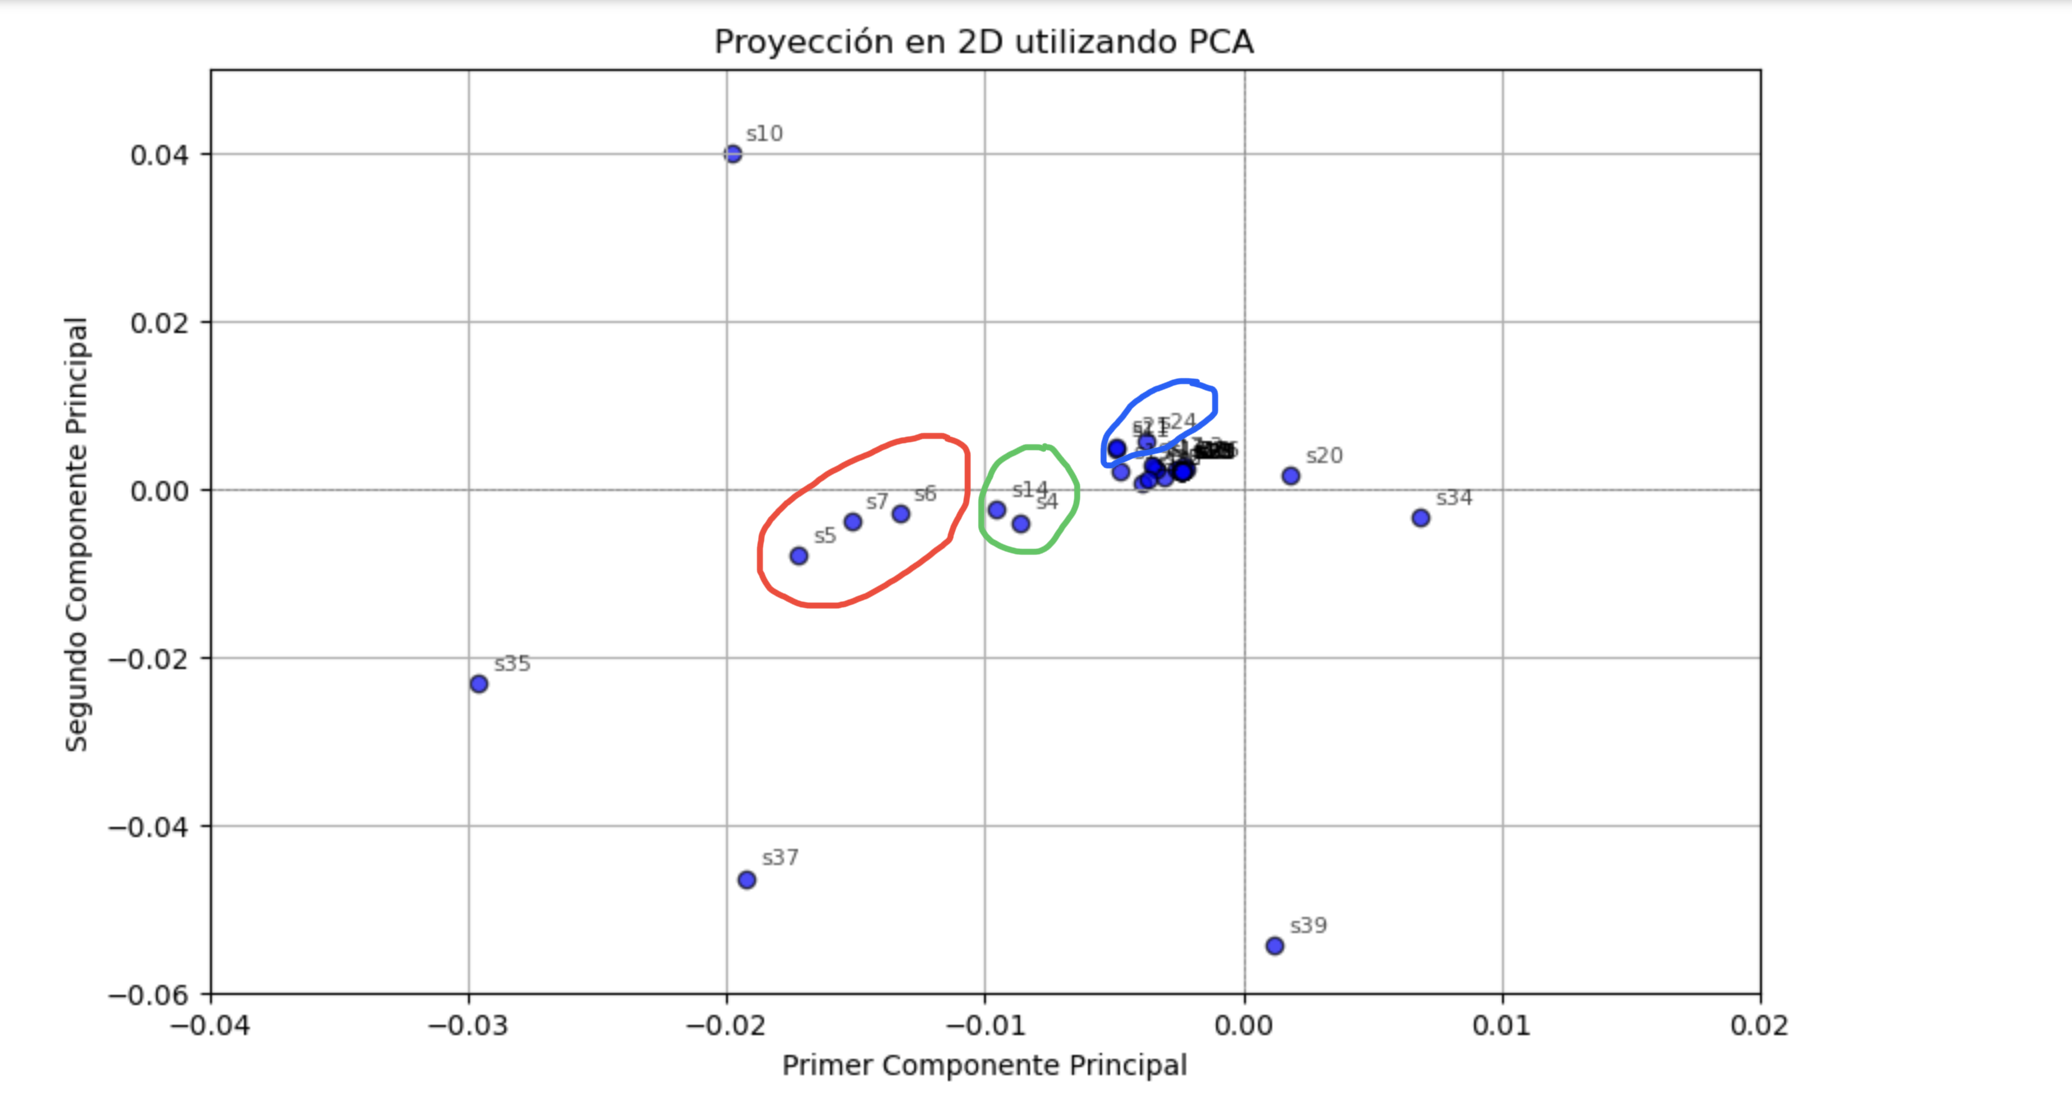

In [55]:
from IPython.display import Image

Image("./PCA_H.jpg", width=1000, height=1000)



Los clusters que pudimos identificar son los formados por: el sector 5,6 y 7 relacionados a los alimentos, el sector 4 y 14 los cuales se intercambian materiales de madera para utilizarlo en la mineria y por ultimo el sector 21 y el 24 los cuales tienen como rubros la fabricación de productos metálicos y no metálicos.

El análisis de componentes principales en la matriz H muestra mayor variabilidad entre sectores debido a los efectos multiplicadores, esto indica que la influencia acumulativa entre sectores introduce una complejidad adicional en la estructura económica.
Otra observacion es que algunos sectores que estaban por debajo del origen en A pasan a estar por encima del ACP de H y esto sugiere que, aunque no sean actores principales en términos de flujos directos, tienen un papel relevante en la economía en función de efectos indirectos y acumulativos, como intermediarios o soportes críticos en la red de interdependencias. 

## Consigna 11

Vamos a calcular la distancia de todos los puntos al origen para poder identificar que sector se encuentra mas lejos y cual más cerca.
Observación: como hay dos filas de Ass donde todas sus componentes son nulas, vamos a obviarlos y a tomar el sector más cercano al origen pero con distancia distinta a 0 para poder hacer un análisis mas completo.

In [57]:
proyeccion1 = H_norm @ avecs_H[0]
proyeccion2 = H_norm @ avecs_H[1]

# Calcular la distancia al origen para cada sector
distancias = np.sqrt(proyeccion1**2 + proyeccion2**2)

# Identificar el sector más lejano
indice_mas_lejano = np.argmax(distancias)

# Identificar el sector más cercano con distancia estrictamente mayor que 0
distancias_mayores_que_cero = distancias[distancias > 0]

if len(distancias_mayores_que_cero) > 0:
    # Encuentra la distancia mínima mayor a 0 y su índice original
    distancia_mas_cercana_no_cero = np.min(distancias_mayores_que_cero)
    indice_mas_cercano = np.where(distancias == distancia_mas_cercana_no_cero)[0][0]

if indice_mas_cercano != -1:
    print("Sector más lejano:", indice_mas_lejano, "con distancia:", distancias[indice_mas_lejano])
    print("Sector más cercano con distancia mayor a 0:", indice_mas_cercano, "con distancia:", distancias[indice_mas_cercano])


Sector más lejano: 36 con distancia: 0.22133479368626888
Sector más cercano con distancia mayor a 0: 20 con distancia: 0.002383704905354979


Ahora vamos a identificar el sector 36 (maxima distancia) y el sector 20 (minima distancia) en la matriz $A^{ss}$ y en $H$. Luego vamos a graficar un gráfico de barras de la fila 15 en ambas matrices (para poder compararlas) y lo mismo para la fila 34.

In [58]:
fila_max_Ass = matriz_Ass[indice_mas_lejano,:]
fila_min_Ass = matriz_Ass[indice_mas_cercano, :]
fila_max_H = H[indice_mas_lejano,:]
fila_min_H = H[indice_mas_cercano,:]


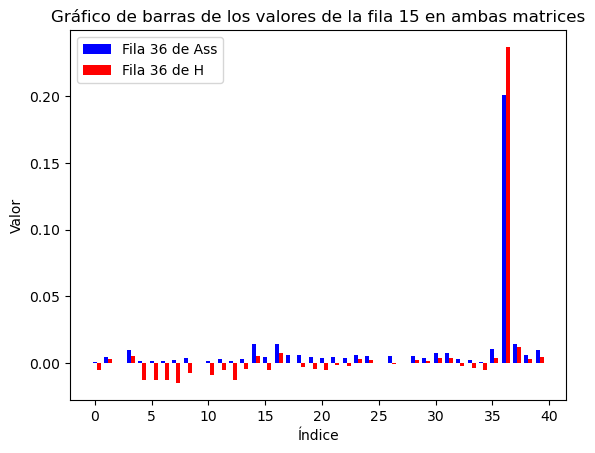

In [60]:

bar_width = 0.35
indices = np.arange(len(fila_max_Ass))

plt.bar(indices, fila_max_Ass, bar_width, label='Fila 36 de Ass', color='blue')
plt.bar(indices + bar_width, fila_max_H, bar_width, label='Fila 36 de H', color='red')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de barras de los valores de la fila 15 en ambas matrices')
plt.legend()
plt.show()

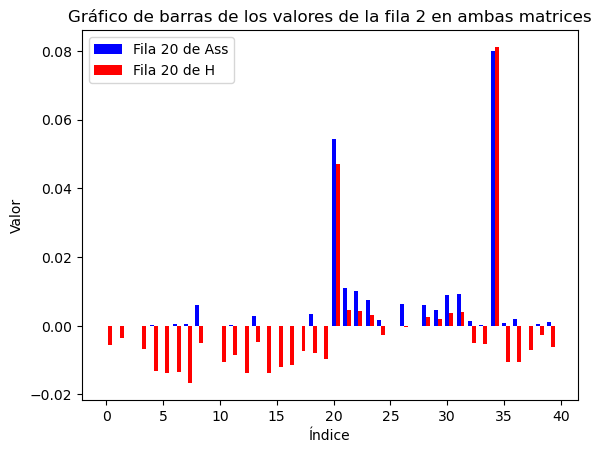

In [61]:
# Graficando barras
bar_width = 0.35
indices = np.arange(len(fila_min_H))

plt.bar(indices, fila_min_Ass, bar_width, label='Fila 20 de Ass', color='blue')
plt.bar(indices + bar_width, fila_min_H, bar_width, label='Fila 20 de H', color='red')

plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Gráfico de barras de los valores de la fila 2 en ambas matrices')
plt.legend()
plt.show()

La fila 36, siendo el punto más alejado del origen en el análisis de componentes principales, sugiere que este sector tiene un comportamiento inusual o distintivo en términos de los flujos. Esto podría implicar que el sector 36 tiene características que se desvían significativamente de los valores promedio de los datos, mostrando valores extremos en el ACP.

El sector 20, al estar más cercano al origen, parece comportarse de manera más representativa o moderada en comparación con los demás sectores. Esto significa que sus flujos no sobresalen de manera significativa en las dimensiones analizadas y podrían estar más en línea con el "promedio" de los sectores en cuanto a las características originales.

La matriz $A^{ss}$ representa los flujos directos entre los sectores de la economía del Salvador, mostrando cómo interactúan directamente entre sí. En cambio, la matriz $H$ incorpora los efectos de las interdependencias entre sectores, reflejando no solo los flujos directos, sino también los impactos indirectos que un sector puede tener en otros a través de múltiples niveles de conexión.

Las diferencias entre $A$ y $H$ se observan en cómo algunos sectores aumentan o disminuyen su influencia cuando se consideran estas relaciones indirectas. Sectores con valores extremos como el sector 36, destacan por su alta relevancia en la economía al afectar y ser afectados en mayor medida por otros sectores, mientras que sectores con valores cercanos al origen en el ACP, como el sector 20, muestran un comportamiento más moderado y representativo del promedio.

En conclusión, la matriz $H$ refuerza y amplifica las relaciones entre sectores al considerar tanto las conexiones directas como las indirectas, capturando la complejidad de las interdependencias económicas en el sistema.